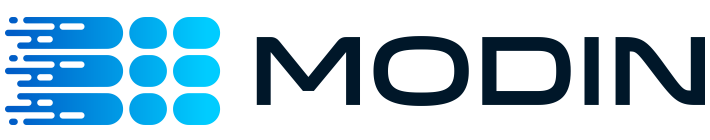

## modin.spreadsheet
`modin.spreadsheet` is a Jupyter notebook widget that allows users to interact with Modin DataFrames in a spreadsheet-like fashion while taking advantage of the underlying capabilities of Modin. The widget makes it quick and easy to explore, sort, filter, edit data and export reproducible code. 

This tutorial will showcase how to use `modin.spreadsheet`. To follow along, just run the cells; no editing required!

In [2]:
# This notebook expects that Modin and Ray are installed, e.g. by `pip install modin[ray]`.
# For all ways to install Modin see official documentation at:
# https://modin.readthedocs.io/en/latest/installation.html
import modin.pandas as pd
import modin.spreadsheet as mss

### Create a Modin DataFrame
The following cells creates a DataFrame using a NYC taxi dataset.

In [3]:
columns_names = [
        "trip_id", "vendor_id", "pickup_datetime", "dropoff_datetime", "store_and_fwd_flag",
        "rate_code_id", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude",
        "passenger_count", "trip_distance", "fare_amount", "extra", "mta_tax", "tip_amount",
        "tolls_amount", "ehail_fee", "improvement_surcharge", "total_amount", "payment_type",
        "trip_type", "pickup", "dropoff", "cab_type", "precipitation", "snow_depth", "snowfall",
        "max_temperature", "min_temperature", "average_wind_speed", "pickup_nyct2010_gid",
        "pickup_ctlabel", "pickup_borocode", "pickup_boroname", "pickup_ct2010",
        "pickup_boroct2010", "pickup_cdeligibil", "pickup_ntacode", "pickup_ntaname", "pickup_puma",
        "dropoff_nyct2010_gid", "dropoff_ctlabel", "dropoff_borocode", "dropoff_boroname",
        "dropoff_ct2010", "dropoff_boroct2010", "dropoff_cdeligibil", "dropoff_ntacode",
        "dropoff_ntaname", "dropoff_puma",
    ]
parse_dates=["pickup_datetime", "dropoff_datetime"]

In [4]:
df = pd.read_csv('https://modin-datasets.s3.amazonaws.com/trips_data.csv', names=columns_names,
                header=None, parse_dates=parse_dates)

To request implementation, send an email to feature_requests@modin.org.


In [5]:
df

,trip_id,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,dropoff_nyct2010_gid,dropoff_ctlabel,dropoff_borocode,dropoff_boroname,dropoff_ct2010,dropoff_boroct2010,dropoff_cdeligibil,dropoff_ntacode,dropoff_ntaname,dropoff_puma
0,1,2,2013-08-01 08:14:37,2013-08-01 09:09:06,N,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,2013-08-01 09:13:00,2013-08-01 11:38:00,N,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,2013-08-01 09:48:00,2013-08-01 09:49:00,N,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,2013-08-01 10:38:35,2013-08-01 10:38:51,N,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2,2013-08-01 11:51:45,2013-08-01 12:03:52,N,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9881,2,2013-09-29 01:03:48,2013-09-29 01:09:49,N,1,-73.958336,40.820820,-73.953773,40.825195,...,907.0,225.0,1.0,Manhattan,22500.0,1022500.0,E,MN04,Hamilton Heights,3802.0
9996,9882,2,2013-09-29 03:04:10,2013-09-29 03:09:37,N,1,-73.958824,40.820251,-73.934174,40.853394,...,912.0,271.0,1.0,Manhattan,27100.0,1027100.0,E,MN35,Washington Heights North,3801.0
9997,9883,2,2013-09-30 16:28:12,2013-09-30 16:56:03,N,1,-73.956100,40.818974,-73.941055,40.789993,...,1318.0,170.0,1.0,Manhattan,17000.0,1017000.0,E,MN33,East Harlem South,3804.0
9998,9884,2,2013-09-01 13:15:15,2013-09-01 13:23:10,N,1,-73.955345,40.820053,-73.942444,40.841507,...,911.0,251.0,1.0,Manhattan,25100.0,1025100.0,E,MN36,Washington Heights South,3801.0


### Generate a spreadsheet widget with the DataFrame
`mss.from_dataframe` takes in a DataFrame, optional configuration options, and returns a `SpreadsheetWidget`, which contains all the logic for displaying the spreadsheet view of the DataFrame. The object returned will not be rendered unless displayed.

In [6]:
spreadsheet = mss.from_dataframe(df)

### Displaying the Spreadsheet
The widget is displayed when the widget is returned by an input cell or passed to the `display` function e.g. `display(spreadsheet)`. When displayed, the SpreadsheetWidget will generate a transformation history cell that contains a record of the transformations applied to the DataFrame unless the cell already exists or the feature is disabled.

### Basic Usage
`from_dataframe` creates a copy of the input DataFrame, so changes do not alter the original DataFrame.

**Filter** - Each column can be filtered according to its datatype using the filter button to the right of the column header. Any number of columns can be filtered simultaneously.\
**Sort** - Each column can be sorted by clicking on the column header. Assumptions on the order of the data should only be made according to the latest sort i.e. the 2nd last sort may not be in order even if grouped by the duplicates in the last sorted column.\
**Cell Edit** - Double click on a cell to edit its value.\
**Add Row**(toolbar) - Click on the `Add Row` button in the toolbar to duplicate the last row in the DataFrame.\
**Remove Row**(toolbar) - Select row(s) on the spreadsheet and click the `Remove Row` button in the toolbar to remove them.\
**Reset Filters**(toolbar) - Click on the `Reset Filters` button in the toolbar to remove all filters on the data.\
**Reset Sort**(toolbar) - Click on the `Reset Sort` button in the toolbar to remove any sorting on the data.

### Transformation History and Reproducible Code
The widget records the history of transformations, such as filtering, that occur on the spreadsheet. These transformations are updated in the `spreadsheet transformation history` cell as they happen and can be easily copied for reproducibility. The history can be cleared using the `Clear History` button in the toolbar.

**Try making some changes to the spreadsheet!**

In [7]:
spreadsheet

SpreadsheetWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, …

In [8]:
# ---- spreadsheet transformation history ----
# Sort column
df.sort_values('trip_id', ascending=True, inplace=True)
# Sort column
df.sort_values('trip_id', ascending=False, inplace=True)
# Filter columns
df = unfiltered_df[(unfiltered_df['trip_id'] >= 14157)].copy()
# Sort column
df.sort_values('trip_id', ascending=False, inplace=True)
# Filter columns
df = unfiltered_df[(unfiltered_df['trip_id'] >= 14157)&(unfiltered_df['trip_id'] <= 41130)].copy()
# Sort column
df.sort_values('trip_id', ascending=False, inplace=True)
# Filter columns
df = unfiltered_df[(unfiltered_df['trip_id'] >= 14157)&(unfiltered_df['trip_id'] <= 41130)&(unfiltered_df['dropoff_datetime'] >= pd.to_datetime(1378944000000, unit='ms')&(unfiltered_df['dropoff_datetime'] <= pd.to_datetime(1380499199999, unit='ms')].copy()
# Sort column
df.sort_values('trip_id', ascending=False, inplace=True)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-8-cdc1795a124d>, line 15)

### Exporting Changes
`to_dataframe` takes in a `SpreadsheetWidget` and returns a copy of the DataFrame reflecting the current state of the UI on the widget. Specifically, any filters, edits, or sorts will be applied on the returned Dataframe.

**Export a DataFrame after making some changes on the spreadsheet UI**

In [ ]:
changed_df = mss.to_dataframe(spreadsheet)

In [ ]:
changed_df

## SpreadsheetWidget API
The API on `SpreadsheetWidget` allows users to replicate some of the functionality on the GUI, but also provides other functionality such as applying the transformation history on another DataFrame or getting the DataFrame that matches the spreadsheet state like `to_dataframe`.

In [ ]:
# Duplicates the `Reset Filters` button
spreadsheet.reset_filters()

In [ ]:
# Duplicates the `Reset Sort` button
spreadsheet.reset_sort()

In [ ]:
# Duplicates the `Clear History` button
spreadsheet.clear_history()

In [ ]:
# Gets the modified DataFrame that matches the changes to the spreadsheet
# This is the same functionality as `mss.to_dataframe`
spreadsheet.get_changed_df()

### Retrieving and Applying Transformation History 
The transformation history can be retrieved as a list of code snippets using the `get_history` API. The `apply_history` API will apply the transformations on the input DataFrame and return the resultant DataFrame.

In [ ]:
spreadsheet.get_history()

In [ ]:
another_df = df.copy()
spreadsheet.apply_history(another_df)

## Additional Example
Here is another example of how to use `from_dataframe`.

In [11]:
mss.from_dataframe(df, show_toolbar=False, grid_options={'forceFitColumns': False, 'editable': False, 'highlightSelectedCell': True})